# Experimenting with clustering algorithms
----

In [50]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import KMeans
%matplotlib inline

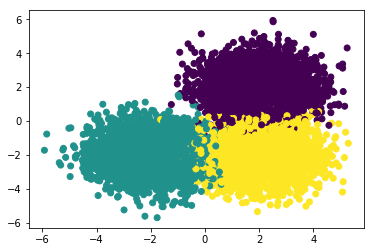

In [4]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## 4 blobs

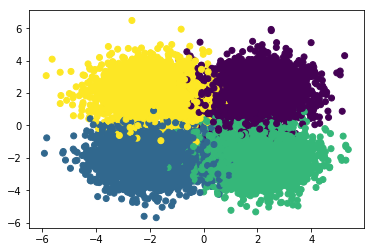

In [7]:
# The coordinates of the centers of our blobs.
centers_2 = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_2, y_2 = make_blobs(
    n_samples=10000,
    centers=centers_2,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2)
plt.show()

#Divide into training and test sets.
X_train_4_blobs, X_test_4_blobs, y_train_4_blobs, y_test_4_blobs = train_test_split(
    X_2,
    y_2,
    test_size=0.9,
    random_state=42)

## Blobs - spread out

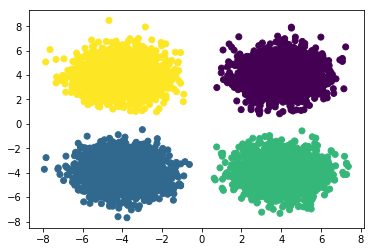

In [13]:
# The coordinates of the centers of our blobs.
centers_3 = [[4, 4], [-4, -4], [4, -4], [-4, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_3, y_3 = make_blobs(
    n_samples=10000,
    centers=centers_3,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3)
plt.show()

#Divide into training and test sets.
X_train_spread_out, X_test_spread_out, y_train_spread_out, y_test_spread_out = train_test_split(
    X_3,
    y_3,
    test_size=0.9,
    random_state=42)

## Blobs - close

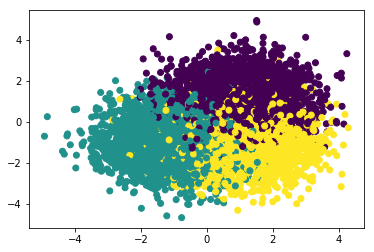

In [26]:
# The coordinates of the centers of our blobs.
centers_4 = [[1, 1], [-1, -1], [1, -1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_4, y_4 = make_blobs(
    n_samples=10000,
    centers=centers_4,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4)
plt.show()

#Divide into training and test sets.
X_train_blobs_close, X_test_blobs_close, y_train_blobs_close, y_test_blobs_close = train_test_split(
    X_4,
    y_4,
    test_size=0.9,
    random_state=42)

## Mean shift - 3 Blobs

Number of estimated clusters: 3


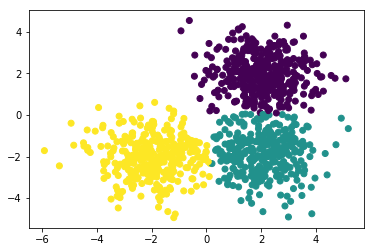

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [24]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## Mean shift - 4 Blobs

In [21]:
bandwidth = estimate_bandwidth(X_train_4_blobs, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_4_blobs)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


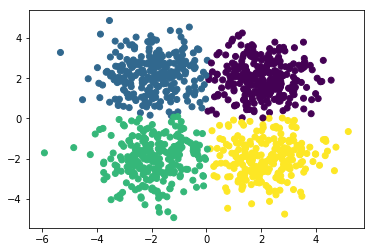

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [22]:
plt.scatter(X_train_4_blobs[:, 0], X_train_4_blobs[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_4_blobs,labels))

Performed similarly to above

## Mean shift - spread out

Number of estimated clusters: 4


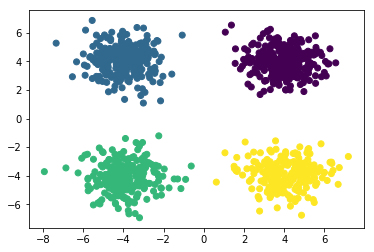

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0


In [23]:
bandwidth = estimate_bandwidth(X_train_spread_out, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_spread_out)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train_spread_out[:, 0], X_train_spread_out[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_spread_out,labels))

Clustering looks really good.

## Mean shift - Blobs Close

Number of estimated clusters: 1


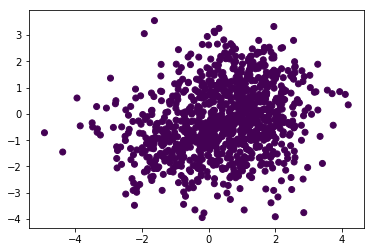

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318


In [30]:
bandwidth = estimate_bandwidth(X_train_blobs_close, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_blobs_close)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train_blobs_close[:, 0], X_train_blobs_close[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_blobs_close,labels))

This does not look good

## Spectral - 3 Blobs

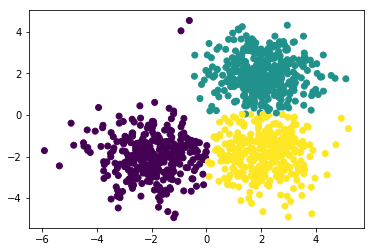

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2  350   10
1      310    1    9
2        6    7  305


In [31]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparable to mean shift with 3 blobs

## Spectral - 4 Blobs

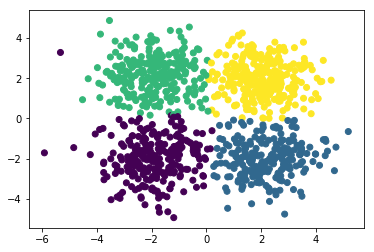

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    3    8  262
1      228    6    5    0
2       11  223    1    3
3       10    0  238    2


In [32]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train_4_blobs)

#Predicted clusters.
predict=sc.fit_predict(X_train_4_blobs)

#Graph results.
plt.scatter(X_train_4_blobs[:, 0], X_train_4_blobs[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_4_blobs,predict))

Looks like it performed comparable to mean shift

## Spectral - spread out

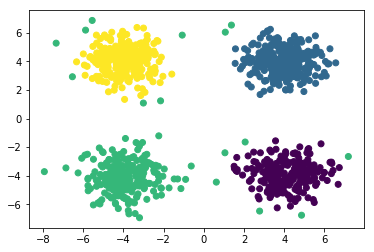

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  271    2    0
1        0    0  239    0
2      232    0    6    0
3        0    0    7  243


In [33]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train_spread_out)

#Predicted clusters.
predict=sc.fit_predict(X_train_spread_out)

#Graph results.
plt.scatter(X_train_spread_out[:, 0], X_train_spread_out[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_spread_out,predict))

Looks slightly worse than mean shift

## Spectral - close

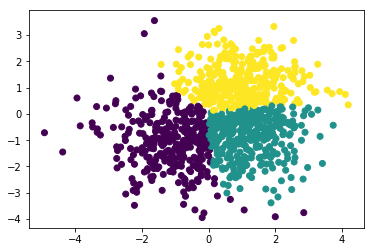

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       14   72  276
1      257   52   11
2       47  233   38


In [34]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train_blobs_close)

#Predicted clusters.
predict=sc.fit_predict(X_train_blobs_close)

#Graph results.
plt.scatter(X_train_blobs_close[:, 0], X_train_blobs_close[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train_blobs_close,predict))

This performed substantially better than Mean-shift

## Affinity Propagation - 3 Blobs

In [35]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


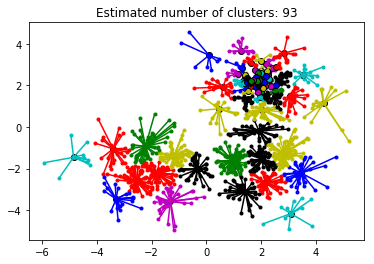

In [36]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Affinity Propagation - 4 Blobs

In [39]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_4_blobs)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


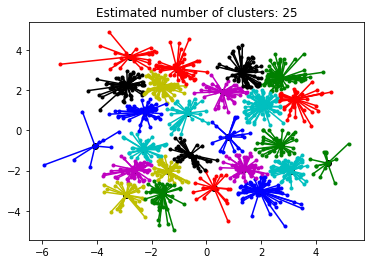

In [40]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train_4_blobs[cluster_centers_indices[k]]
    plt.plot(X_train_4_blobs[class_members, 0], X_train_4_blobs[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train_4_blobs[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Affinity Propagation -  Spread Out

In [41]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_spread_out)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 119


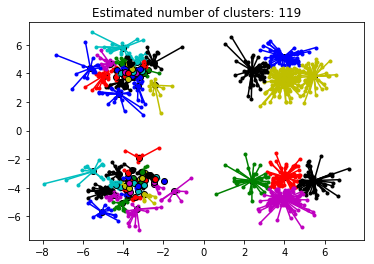

In [42]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train_spread_out[cluster_centers_indices[k]]
    plt.plot(X_train_spread_out[class_members, 0], X_train_spread_out[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train_spread_out[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Spectral - close

In [43]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_blobs_close)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 36


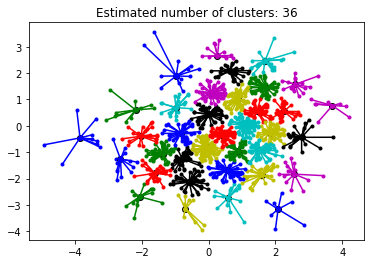

In [44]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train_blobs_close[cluster_centers_indices[k]]
    plt.plot(X_train_blobs_close[class_members, 0], X_train_blobs_close[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train_blobs_close[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## K-means - 3 Blobs

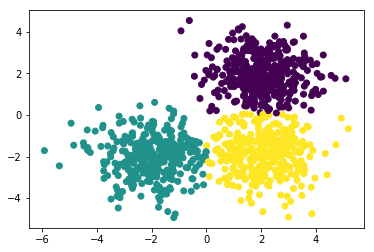

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    1    6
1        0  310    5
2       10    9  307


In [52]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

## Kmeans - 4 Blobs

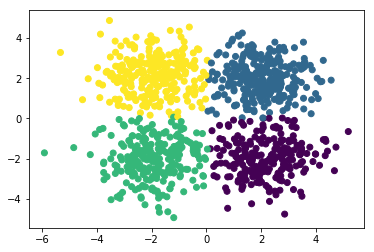

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [53]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train_4_blobs)

# Plot the solution.
plt.scatter(X_train_4_blobs[:, 0], X_train_4_blobs[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train_4_blobs))

## Kmeans - Spread Out

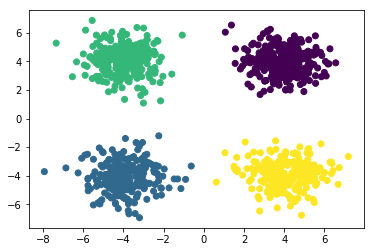

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  239    0    0
2        0    0    0  250
3        0    0  238    0


In [54]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train_spread_out)

# Plot the solution.
plt.scatter(X_train_spread_out[:, 0], X_train_spread_out[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train_spread_out))

## Kmeans - Close

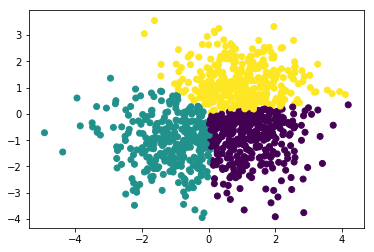

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0       67   51  235
1       12  256   42
2      283   13   41


In [55]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train_blobs_close)

# Plot the solution.
plt.scatter(X_train_blobs_close[:, 0], X_train_blobs_close[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train_blobs_close))